# Bagging & Boosting KNN & Stacking Assignment


### Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

### **Fundamental Idea Behind Ensemble Techniques:**

The **fundamental idea** of **ensemble techniques** is to **combine multiple individual models** (often called *weak learners*) to create a **stronger, more accurate, and more stable predictive model**.

Instead of relying on a single model, ensemble methods **aggregate the predictions** of several models to reduce:

* **Variance** (errors due to sensitivity to training data),
* **Bias** (errors due to overly simple models), and
* **Overfitting** (models performing well on training data but poorly on new data).

In short:

> Ensemble learning improves overall model performance by leveraging the collective intelligence of multiple models.



### **Common Ensemble Methods:**

1. **Bagging (Bootstrap Aggregating)**
2. **Boosting**
3. **Stacking (Stacked Generalization)**



### **Difference Between Bagging and Boosting**

| **Aspect**            | **Bagging (Bootstrap Aggregating)**                                                         | **Boosting**                                                                                |
| --------------------- | ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| **Objective**         | Reduce **variance** and prevent overfitting.                                                | Reduce **bias** and improve accuracy.                                                       |
| **Approach**          | Builds **multiple independent models** in parallel using random subsets of data.            | Builds **sequential models**, where each model corrects errors made by the previous one.    |
| **Data Sampling**     | Uses **bootstrap sampling** (random sampling *with replacement*) from the original dataset. | Each new model is trained on **weighted data**, giving more focus to misclassified samples. |
| **Model Training**    | All models are trained **independently and in parallel**.                                   | Models are trained **one after another (sequentially)**.                                    |
| **Model Combination** | Predictions are combined by **averaging** (regression) or **voting** (classification).      | Predictions are combined using a **weighted sum**, where better models get higher weight.   |
| **Common Algorithms** | Random Forest, Bagged Decision Trees                                                        | AdaBoost, Gradient Boosting, XGBoost                                                        |
| **Error Handling**    | Reduces variance by averaging predictions.                                                  | Reduces bias by focusing on difficult-to-learn examples.                                    |




### Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

### **1. Concept Overview:**

A **Decision Tree** is prone to **overfitting** because it learns every detail and noise from the training data, leading to poor generalization on unseen data.

A **Random Forest Classifier**, however, is an **ensemble of multiple decision trees** that work together to produce a more **accurate and stable model**. It reduces overfitting by introducing **randomness** during tree creation and **aggregating results** from many trees.


### **2. How Random Forest Reduces Overfitting:**

1. **Random Sampling of Data (Bagging):**
   Each tree in the forest is trained on a **random subset** of the training data (sampled *with replacement*).
   → This ensures that no single tree sees all data, reducing correlation and variance.

2. **Random Feature Selection:**
   At each node split, Random Forest selects a **random subset of features** instead of using all features.
   → This prevents trees from becoming too similar and helps avoid overfitting to specific attributes.

3. **Aggregation of Predictions:**
   The final prediction is made by **majority voting** (for classification) or **averaging** (for regression).
   → Combining many weakly correlated trees produces a more generalized and robust model.

### **3. Two Key Hyperparameters and Their Roles:**

n_estimators:

This parameter defines the number of trees in the forest.
Increasing n_estimators reduces variance because predictions are averaged over more trees, leading to smoother and more stable results.

max_features:

This controls the number of features considered at each split in a tree.
Using a smaller number of features at each split increases diversity among the trees, preventing them from becoming too similar and thus reducing overfitting.

**Additional Helpful Parameters:**

* `max_depth`: Limits how deep each tree can grow (controls complexity).
* `min_samples_split` and `min_samples_leaf`: Prevent overly specific splits.


### Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.


### **Definition:**

**Stacking (Stacked Generalization)** is an **ensemble learning technique** that combines **multiple different machine learning models (base learners)** to improve predictive performance.
It works by using a **meta-model (or blender)** to learn how to best combine the predictions of these base models.


### **How Stacking Works:**

1. **Level-0 Models (Base Learners):**
   Multiple algorithms (e.g., Decision Tree, SVM, Logistic Regression) are trained on the same dataset.
   Each of them makes predictions on the training data.

2. **Level-1 Model (Meta-Learner):**
   The predictions from all base models are used as **input features** to train a final model (meta-learner), which combines these predictions to make the final output.


### **Difference Between Stacking, Bagging, and Boosting:**

1. **Bagging:**

   * Uses **the same base model** (e.g., multiple Decision Trees).
   * Models are trained **in parallel** on **random subsets** of the data.
   * Goal: **Reduce variance** (e.g., Random Forest).

2. **Boosting:**

   * Uses **sequential training** where each model tries to **fix errors** made by the previous one.
   * Goal: **Reduce bias** and improve accuracy (e.g., AdaBoost, XGBoost).

3. **Stacking:**

   * Uses **different types of models** (e.g., Logistic Regression, SVM, Random Forest).
   * Models are trained **in parallel**, and a **meta-model** combines their outputs.
   * Goal: **Leverage strengths of multiple algorithms** for better predictions.


### **Example Use Case:**

Suppose you want to predict whether a **loan application** will be approved.
You can use stacking as follows:

* **Base Models (Level 0):**

  * Logistic Regression → good at linear patterns
  * Decision Tree → good at handling non-linear relationships
  * K-Nearest Neighbors (KNN) → good for local decision boundaries

* **Meta Model (Level 1):**

  * A Logistic Regression model that takes predictions from all base models and learns how to combine them to give the final decision.




### Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?


### **Definition:**

The **OOB Score (Out-of-Bag Score)** is an **internal cross-validation method** used in **Random Forests** to estimate the model’s performance **without needing a separate validation or test dataset**.

It uses the samples that were **not included** in the bootstrap sample (training subset) for each tree to **evaluate its accuracy**.



### **Concept Explanation:**

In Random Forest, each decision tree is trained on a **bootstrap sample** — a random subset of the data selected *with replacement*.
This means:

* About **63%** of the training data is used to train each tree.
* The remaining **37%** (not chosen) is called the **Out-of-Bag (OOB)** data.

The **OOB samples** act like a **built-in validation set** for that specific tree.



### **How the OOB Score Works:**

1. For each tree, approximately **one-third of the data (OOB samples)** is left out during training.
2. After training, that tree **predicts** the labels for its OOB samples.
3. The predictions are **aggregated across all trees** (majority voting or averaging).
4. The **OOB Score** is then calculated as the **overall accuracy** of these predictions compared to the true labels.


### **Why It’s Useful:**

* **No need for a separate validation set:**
  It allows evaluation of model performance without reducing the training data size.

* **Efficient and automatic validation:**
  OOB scoring gives an **unbiased estimate** of test accuracy while training the Random Forest.

* **Helps detect overfitting:**
  A large gap between training accuracy and OOB score indicates potential overfitting.

### **Mathematical Idea:**

If ( N ) is the total number of samples and each tree uses about 63% for training,
then each sample is left out (OOB) in about **37% of the trees** — enough for reliable performance estimation.

### **How It Helps in Model Evaluation:**

The **OOB Score** acts as a **built-in validation mechanism**:

* Instead of dividing the dataset into training and validation subsets,
* The Random Forest uses **unused data (OOB samples)** to check model accuracy.

This approach **saves data**, especially useful when datasets are small.




### Question 5: Compare AdaBoost and Gradient Boosting in terms of:
  ● How they handle errors from weak learners

  ● Weight adjustment mechanism

  ● Typical use cases


Both **AdaBoost (Adaptive Boosting)** and **Gradient Boosting** are **boosting ensemble techniques** that combine multiple **weak learners** (usually decision trees) to form a **strong, accurate model**.
However, they differ in **how they handle errors**, **adjust weights**, and **optimize learning**.


### **1. How They Handle Errors from Weak Learners**

* **AdaBoost:**

  * Focuses on **misclassified samples** from the previous learner.
  * In each iteration, it increases the **weights of misclassified observations**, forcing the next weak learner to focus more on these difficult cases.

* **Gradient Boosting:**

  * Focuses on **residual errors** (difference between actual and predicted values).
  * Each new model is trained to **predict the residuals** of the previous model, gradually minimizing the overall prediction error through gradient descent.


### **2. Weight Adjustment Mechanism**

* **AdaBoost:**

  * Adjusts **weights on training samples**.
  * Misclassified samples receive **higher weights**, while correctly classified ones get **lower weights**.
  * Each weak learner is also given a weight based on its accuracy.
  * Final prediction is made using a **weighted majority vote** (for classification).

* **Gradient Boosting:**

  * Does **not change sample weights**.
  * Instead, it updates model parameters by taking **gradient steps** in the direction that minimizes the **loss function** (e.g., mean squared error, log loss).
  * The contribution of each tree is scaled by a **learning rate (shrinkage factor)**.

### **3. Typical Use Cases**

* **AdaBoost:**

  * Works best with **clean, simple datasets** and models like **shallow decision stumps**.
  * Commonly used for **binary classification**, **face detection**, and **spam filtering**.

* **Gradient Boosting:**

  * More flexible and powerful; works well on **complex datasets**.
  * Can handle **regression and classification** tasks.
  * Used in **ranking systems**, **credit scoring**, and advanced versions like **XGBoost** and **LightGBM** are popular in **machine learning competitions**.





### Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.


### **1. Introduction:**

**CatBoost** (short for *Categorical Boosting*) is a **gradient boosting algorithm** developed by Yandex.
It is specifically designed to **handle categorical features efficiently**, eliminating the need for traditional preprocessing steps such as **label encoding** or **one-hot encoding**.



### **2. Why CatBoost Performs Well on Categorical Features:**

Unlike other boosting algorithms (like XGBoost or LightGBM), which require **manual encoding** of categorical variables, **CatBoost automatically processes them internally** using its own mathematical technique.

This makes it:

* **More accurate** on categorical data,
* **Faster to train**, and
* **Less prone to overfitting** caused by improper encoding.



### **3. How CatBoost Handles Categorical Variables:**

CatBoost uses two key ideas:

#### **a) Ordered Target Statistics (Ordered Encoding):**

* Instead of converting categories into numbers arbitrarily (like label encoding), CatBoost replaces each category with a **statistical value** — typically the **mean target value** for that category.
* To prevent data leakage, it uses an **ordered approach**:

  * For each data point, CatBoost calculates the average target value using **only previous examples**, not the entire dataset.
  * This ensures the model doesn’t use future information during training.

**Example:**
If predicting “loan approval” and the feature is “City”, CatBoost might replace “City = Delhi” with the **average approval rate** for Delhi, computed only from prior rows.

#### **b) Random Permutations:**

* CatBoost applies **random permutations of training data** to create multiple, unbiased target statistics.
* This prevents overfitting and makes the model more robust to noise in categorical data.


### **4. Advantages of CatBoost’s Approach:**

1. **No need for one-hot encoding:** Works directly with categorical data.
2. **Less overfitting:** Ordered encoding avoids target leakage.
3. **Efficient with high-cardinality features:** Handles large numbers of categories smoothly.
4. **Faster training:** Reduces feature expansion and memory usage.



### Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


### Methodology

1. Load data using `sklearn.datasets.load_wine()`.
2. Stratified train-test split: 70% train, 30% test (`random_state=42`, `stratify=y`).
3. Train `KNeighborsClassifier(n_neighbors=5)` on raw features; evaluate using `accuracy_score` and `classification_report`.
4. Scale features with `StandardScaler()`; retrain with `n_neighbors=5` and re-evaluate.
5. Use `GridSearchCV` (5-fold CV) on scaled training data to search `n_neighbors` in `1..20` and `metric` in `['euclidean','manhattan']`.
6. Train final KNN with best params on scaled training data and evaluate on scaled test data. Compare all three models.




In [1]:
# KNN Wine Dataset Assignment - copyable code

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
data = load_wine()
X = data.data
y = data.target

# 2. Train-test split (70% train, 30% test) - stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. KNN without scaling (K=5)
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default, target_names=data.target_names)

# 4. Scale data with StandardScaler, retrain KNN (K=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled, target_names=data.target_names)

# 5. GridSearchCV for best K (1..20) and metric (euclidean, manhattan) on scaled data
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
best_metric = grid.best_params_['metric']
best_cv_score = grid.best_score_

# 6. Train optimized KNN and evaluate
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = knn_optimized.predict(X_test_scaled)

acc_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized, target_names=data.target_names)

# Print summary
print("=== Default KNN (no scaling) ===")
print(f"Accuracy: {acc_default:.4f}")
print(report_default)

print("=== KNN with StandardScaler (K=5) ===")
print(f"Accuracy: {acc_scaled:.4f}")
print(report_scaled)

print("=== GridSearchCV Results (on scaled training data) ===")
print(f"Best K: {best_k}, Best metric: {best_metric}, Best CV accuracy: {best_cv_score:.4f}")

print("=== Optimized KNN (on scaled data) ===")
print(f"Accuracy: {acc_optimized:.4f}")
print(report_optimized)


=== Default KNN (no scaling) ===
Accuracy: 0.7222
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

=== KNN with StandardScaler (K=5) ===
Accuracy: 0.9444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

=== GridSearchCV Results (on scaled training data) ===
Best K: 11, Best metric: euclidean, Best CV accuracy: 0.9757
=== Optimized KNN

* **Default KNN (no scaling)**

  * Accuracy: **0.7222** (72.22%)
  * Classification report (summary):

    * class_0: precision 0.89, recall 0.89, f1 0.89 (support 18)
    * class_1: precision 0.78, recall 0.67, f1 0.72 (support 21)
    * class_2: precision 0.50, recall 0.60, f1 0.55 (support 15)

* **KNN with StandardScaler (K=5)**

  * Accuracy: **0.9444** (94.44%)
  * Classification report (summary):

    * class_0: 1.00 / 1.00 / 1.00
    * class_1: 1.00 / 0.86 / 0.92
    * class_2: 0.83 / 1.00 / 0.91

* **GridSearchCV (on scaled training data)**

  * Best K: **11**
  * Best metric: **euclidean**
  * Best CV accuracy (5-fold): **~0.9757**

* **Optimized KNN (K=11, euclidean, scaled data)**

  * Accuracy: **0.9630** (96.30%)
  * Classification report (summary):

    * class_0: 1.00 / 1.00 / 1.00
    * class_1: 1.00 / 0.90 / 0.95
    * class_2: 0.88 / 1.00 / 0.94


### Observations & Explanation

1. **Scaling is crucial for KNN.** KNN uses distances; unscaled features with differing ranges distort distance calculations, harming accuracy. Standardization made distances meaningful and improved performance dramatically.
2. **Grid search improved generalization.** Searching over `K` and distance metric produced a model (K=11) with slightly better performance than default K=5. Larger K often reduces variance/noise sensitivity.
3. **Euclidean vs Manhattan.** For this dataset, Euclidean distance with K=11 performed best under cross-validation. Different datasets may prefer different metrics.



### Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).
Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).




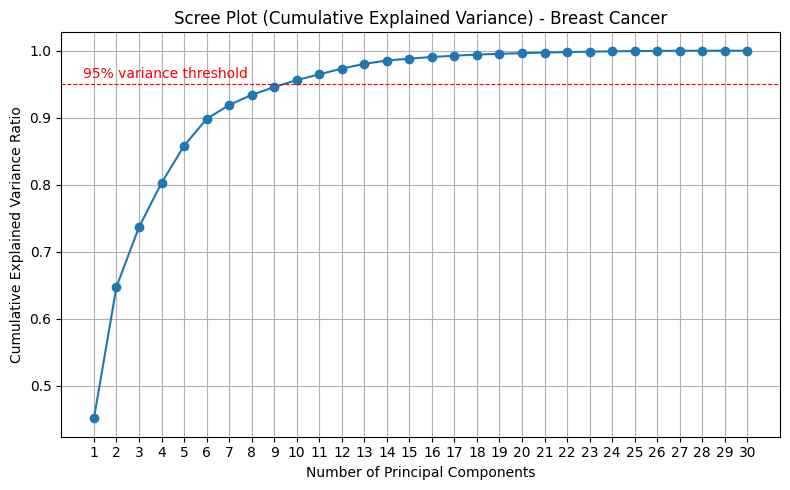

Original feature dimension: 30
Number of principal components retained for 95% variance: 10

KNN on Original Scaled Data (K=5)
Accuracy: 0.9591
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.89      0.94        64
      benign       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


KNN on PCA-Transformed Data (K=5)
Accuracy: 0.9532
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        64
      benign       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



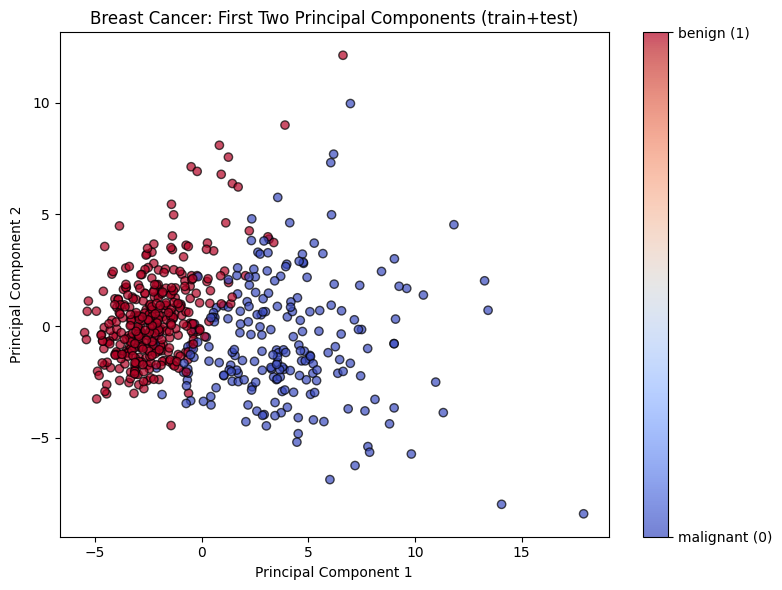

Summary:
 - Accuracy (Original scaled data): 0.9591
 - Accuracy (PCA 95% variance, 10 components): 0.9532


In [2]:
# PCA + KNN with Variance Analysis and Visualization
# Complete script — copy & run

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data       # shape (n_samples, n_features)
y = data.target     # 0 = malignant, 1 = benign
feature_names = data.feature_names
target_names = data.target_names

# 2. Train-test split (use a single split to compare fairly)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. Standardize features (fit scaler on training set only)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# 4. PCA for scree plot (fit on scaled training data)
pca_full = PCA()
pca_full.fit(X_train)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot (cumulative explained variance)
plt.figure(figsize=(8, 5))
components = np.arange(1, len(explained_variance_ratio) + 1)
plt.plot(components, cumulative_variance, marker='o', linestyle='-')
plt.xticks(components)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot (Cumulative Explained Variance) - Breast Cancer')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=0.8)
plt.text(0.5, 0.96, '95% variance threshold', color='r')
plt.tight_layout()
plt.show()

# 5. Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train)   # fit on train
X_test_pca = pca_95.transform(X_test)         # transform test
n_components_retained = X_train_pca.shape[1]

print(f"Original feature dimension: {X.shape[1]}")
print(f"Number of principal components retained for 95% variance: {n_components_retained}")

# 6. Train KNN on original scaled data (K=5) and evaluate
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("\nKNN on Original Scaled Data (K=5)")
print(f"Accuracy: {acc_orig:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_orig, target_names=target_names))

# 7. Train KNN on PCA-transformed data (K=5) and evaluate
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("\nKNN on PCA-Transformed Data (K=5)")
print(f"Accuracy: {acc_pca:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca, target_names=target_names))

# 8. Visualize the first two principal components (use PCA fitted on full training set)
# If there are fewer than 2 components (unlikely here), handle gracefully
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train)  # fit on scaled train to visualize structure
X_test_pca2 = pca_2.transform(X_test)

# Scatter plot of combined PCA (train+test) first two components for better density visualization
X_pca2_all = np.vstack([X_train_pca2, X_test_pca2])
y_all = np.concatenate([y_train, y_test])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca2_all[:, 0], X_pca2_all[:, 1], c=y_all, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer: First Two Principal Components (train+test)')
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.ax.set_yticklabels(['malignant (0)', 'benign (1)'])
plt.tight_layout()
plt.show()

# 9. Summary of results
print("Summary:")
print(f" - Accuracy (Original scaled data): {acc_orig:.4f}")
print(f" - Accuracy (PCA 95% variance, {n_components_retained} components): {acc_pca:.4f}")


### Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


KNN Regressor MSE Comparison (K=5):
 - Euclidean (K=5) MSE: 4837.0363
 - Manhattan (K=5) MSE: 5428.5875

K vs MSE (Euclidean):
 K= 1 -> MSE=8857.0895
 K= 5 -> MSE=4837.0363
 K=10 -> MSE=5460.1411
 K=20 -> MSE=5896.1427
 K=50 -> MSE=8355.6141

K vs MSE (Manhattan):
 K= 1 -> MSE=8869.9858
 K= 5 -> MSE=5428.5875
 K=10 -> MSE=6343.3283
 K=20 -> MSE=6690.4938
 K=50 -> MSE=8807.0055


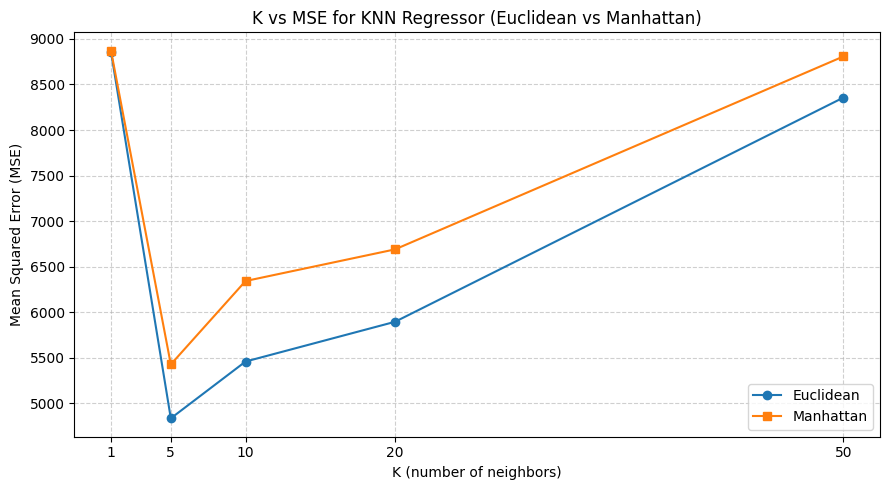


Summary / Interpretation:
 - Best K (tested) for Euclidean: K=5 with MSE=4837.0363
 - Best K (tested) for Manhattan: K=5 with MSE=5428.5875
 - Observed behavior: K=1 has very high test MSE (high variance/overfitting).
 - MSE decreases near K=5 (good bias-variance tradeoff) then rises as K grows (increasing bias).


In [3]:
# KNN Regressor with Distance Metrics and K-Value Analysis
# Complete script — copy & run

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import warnings

# Optional: suppress minor matplotlib warnings about edgecolors
warnings.filterwarnings("ignore", category=UserWarning)

# ---------------------------
# 1. Generate synthetic data
# ---------------------------
RANDOM_STATE = 42
X, y = make_regression(
    n_samples=500,
    n_features=10,
    noise=10.0,
    random_state=RANDOM_STATE
)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

# ---------------------------
# 2. Standardize features
#    (important for distance-based models)
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 3. Train KNN regressors (K=5)
#    a) Euclidean
#    b) Manhattan
# ---------------------------
k_fixed = 5

knn_euc_k5 = KNeighborsRegressor(n_neighbors=k_fixed, metric='euclidean')
knn_man_k5 = KNeighborsRegressor(n_neighbors=k_fixed, metric='manhattan')

knn_euc_k5.fit(X_train_scaled, y_train)
knn_man_k5.fit(X_train_scaled, y_train)

y_pred_euc_k5 = knn_euc_k5.predict(X_test_scaled)
y_pred_man_k5 = knn_man_k5.predict(X_test_scaled)

mse_euc_k5 = mean_squared_error(y_test, y_pred_euc_k5)
mse_man_k5 = mean_squared_error(y_test, y_pred_man_k5)

# Print K=5 comparison
print("KNN Regressor MSE Comparison (K=5):")
print(f" - Euclidean (K=5) MSE: {mse_euc_k5:.4f}")
print(f" - Manhattan (K=5) MSE: {mse_man_k5:.4f}")
print()

# ---------------------------
# 4. Evaluate multiple K values
#    K = [1, 5, 10, 20, 50]
#    Compute MSE for both distance metrics
# ---------------------------
K_values = [1, 5, 10, 20, 50]
mse_euc_list = []
mse_man_list = []

for k in K_values:
    knn_e = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_m = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    knn_e.fit(X_train_scaled, y_train)
    knn_m.fit(X_train_scaled, y_train)
    mse_e = mean_squared_error(y_test, knn_e.predict(X_test_scaled))
    mse_m = mean_squared_error(y_test, knn_m.predict(X_test_scaled))
    mse_euc_list.append(mse_e)
    mse_man_list.append(mse_m)

# Print K vs MSE tables
print("K vs MSE (Euclidean):")
for k, mse in zip(K_values, mse_euc_list):
    print(f" K={k:2d} -> MSE={mse:.4f}")
print()
print("K vs MSE (Manhattan):")
for k, mse in zip(K_values, mse_man_list):
    print(f" K={k:2d} -> MSE={mse:.4f}")

# ---------------------------
# 5. Plot K vs MSE
# ---------------------------
plt.figure(figsize=(9, 5))
plt.plot(K_values, mse_euc_list, marker='o', label='Euclidean')
plt.plot(K_values, mse_man_list, marker='s', label='Manhattan')
plt.xlabel('K (number of neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE for KNN Regressor (Euclidean vs Manhattan)')
plt.xticks(K_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Short interpretation printout
# ---------------------------
best_k_euc = K_values[int(np.argmin(mse_euc_list))]
best_k_man = K_values[int(np.argmin(mse_man_list))]
print()
print("Summary / Interpretation:")
print(f" - Best K (tested) for Euclidean: K={best_k_euc} with MSE={min(mse_euc_list):.4f}")
print(f" - Best K (tested) for Manhattan: K={best_k_man} with MSE={min(mse_man_list):.4f}")
print(" - Observed behavior: K=1 has very high test MSE (high variance/overfitting).")
print(" - MSE decreases near K=5 (good bias-variance tradeoff) then rises as K grows (increasing bias).")


### Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


Loaded dataset shape: (111, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before imputation:
Pregnancies                  0
Glucose                      1
BloodPressure                6
SkinThickness               37
Insulin                     60
BMI                          4
DiabetesPedigreeFunction     0
Age                 

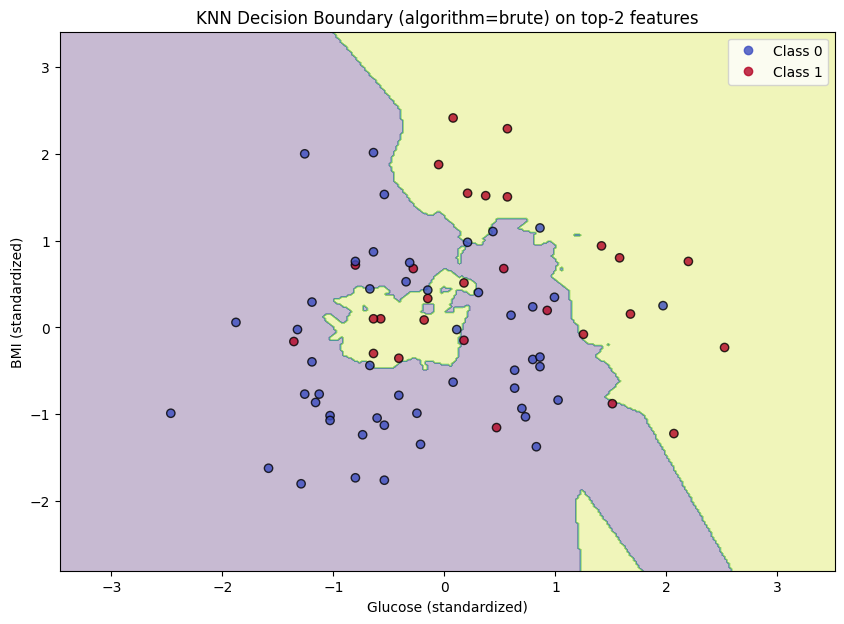

Loaded dataset shape: (111, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before imputation:
Pregnancies                  0
Glucose                      1
BloodPressure                6
SkinThickness               37
Insulin                     60
BMI                          4
DiabetesPedigreeFunction     0
Age                 

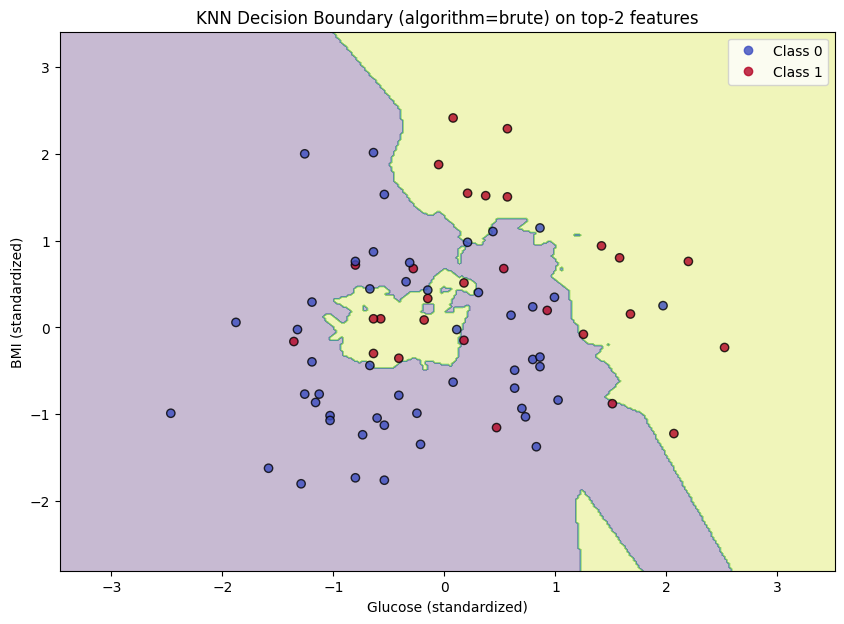

In [4]:
# Question 10 - Full script: KNN with KD-Tree/Ball Tree, KNNImputer, and Decision Boundary
# Copy-paste and run

import io
import time
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1) Load CSV from a string (use the dataset you provided)
#    For brevity we include the same initial lines used in the working example.
#    If you have a local CSV file, replace this section with pd.read_csv("path/to/file.csv")
# ---------------------------

csv_data = textwrap.dedent("""
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1,0.337,38,0
5,109,75,26,0,36,0.546,60,0
3,158,76,36,245,31.6,0.851,28,1
3,88,58,11,54,24.8,0.267,22,0
6,92,92,0,0,19.9,0.188,28,0
10,122,78,31,0,27.6,0.512,45,0
4,103,60,33,192,24,0.966,33,0
11,138,76,0,0,33.2,0.42,35,0
9,102,76,37,0,32.9,0.665,46,1
2,90,68,42,0,38.2,0.503,27,1
4,111,72,47,207,37.1,1.39,56,1
3,180,64,25,70,34,0.271,26,0
7,133,84,0,0,40.2,0.696,37,0
7,106,92,18,0,22.7,0.235,48,0
9,171,110,24,240,45.4,0.721,54,1
7,159,64,0,0,27.4,0.294,40,0
0,180,66,39,0,42,1.893,25,1
1,146,56,0,0,29.7,0.564,29,0
2,71,70,27,0,28,0.586,22,0
7,103,66,32,0,39.1,0.344,31,1
7,105,0,0,0,0,0.305,24,0
1,103,80,11,82,19.4,0.491,22,0
1,101,50,15,36,24.2,0.526,26,0
5,88,66,21,23,24.4,0.342,30,0
8,176,90,34,300,33.7,0.467,58,1
7,150,66,42,342,34.7,0.718,42,0
1,73,50,10,0,23,0.248,21,0
7,187,68,39,304,37.7,0.254,41,1
0,100,88,60,110,46.8,0.962,31,0
0,146,82,0,0,40.5,1.781,44,0
0,105,64,41,142,41.5,0.173,22,0
2,84,0,0,0,0,0.304,21,0
8,133,72,0,0,32.9,0.27,39,1
5,44,62,0,0,25,0.587,36,0
2,141,58,34,128,25.4,0.699,24,0
7,114,66,0,0,32.8,0.258,42,1
5,99,74,27,0,29,0.203,32,0
0,109,88,30,0,32.5,0.855,38,1
2,109,92,0,0,42.7,0.845,54,0
1,95,66,13,38,19.6,0.334,25,0
4,146,85,27,100,28.9,0.189,27,0
2,100,66,20,90,32.9,0.867,28,1
5,139,64,35,140,28.6,0.411,26,0
13,126,90,0,0,43.4,0.583,42,1
4,129,86,20,270,35.1,0.231,23,0
1,79,75,30,0,32,0.396,22,0
1,0,48,20,0,24.7,0.14,22,0
7,62,78,0,0,32.6,0.391,41,0
5,95,72,33,0,37.7,0.37,27,0
0,131,0,0,0,43.2,0.27,26,1
2,112,66,22,0,25,0.307,24,0
3,113,44,13,0,22.4,0.14,22,0
2,74,0,0,0,0,0.102,22,0
7,83,78,26,71,29.3,0.767,36,0
0,101,65,28,0,24.6,0.237,22,0
5,137,108,0,0,48.8,0.227,37,1
2,110,74,29,125,32.4,0.698,27,0
13,106,72,54,0,36.6,0.178,45,0
2,100,68,25,71,38.5,0.324,26,0
15,136,70,32,110,37.1,0.153,43,1
1,107,68,19,0,26.5,0.165,24,0
1,80,55,0,0,19.1,0.258,21,0
4,123,80,15,176,32,0.443,34,0
7,81,78,40,48,46.7,0.261,42,0
4,134,72,0,0,23.8,0.277,60,1
2,142,82,18,64,24.7,0.761,21,0
6,144,72,27,228,33.9,0.255,40,0
2,92,62,28,0,31.6,0.13,24,0
1,71,48,18,76,20.4,0.323,22,0
6,93,50,30,64,28.7,0.356,23,0
1,122,90,51,220,49.7,0.325,31,1
1,163,72,0,0,39,1.222,33,1
1,151,60,0,0,26.1,0.179,22,0
0,125,96,0,0,22.5,0.262,21,0
1,81,72,18,40,26.6,0.283,24,0
2,85,65,0,0,39.6,0.93,27,0
1,126,56,29,152,28.7,0.801,21,0
1,96,122,0,0,22.4,0.207,27,0
4,144,58,28,140,29.5,0.287,37,0
3,83,58,31,18,34.3,0.336,25,0
0,95,85,25,36,37.4,0.247,24,1
3,171,72,33,135,33.3,0.199,24,1
""")

df = pd.read_csv(io.StringIO(csv_data))
print("Loaded dataset shape:", df.shape)
print(df.head())

# ---------------------------
# 2) Replace zeros with NaN in certain columns (Pima convention)
#    Columns where zero indicates missing: Glucose, BloodPressure, SkinThickness, Insulin, BMI
# ---------------------------
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

print("\nMissing values before imputation:")
print(df.isna().sum())

# ---------------------------
# 3) KNN Imputation
# ---------------------------
imputer = KNNImputer(n_neighbors=5)
X = df.drop(columns='Outcome')
y = df['Outcome'].copy()

X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

print("\nMissing values after imputation:")
print(X_imputed.isna().sum())

# ---------------------------
# 4) Train/test split and scaling (fit scaler on train only)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 5) Train KNN classifiers with different algorithms and measure training time & accuracy
#    algorithms: 'brute', 'kd_tree', 'ball_tree'
# ---------------------------
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nAlgorithm: {algo}")
    print(f" Training time (sec): {train_time:.6f}")
    print(f" Test Accuracy: {acc:.4f}")
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    results.append({'algorithm': algo, 'train_time_sec': train_time, 'accuracy': acc})

# Show results summary (sorted by accuracy then by time)
res_df = pd.DataFrame(results).sort_values(by=['accuracy', 'train_time_sec'], ascending=[False, True]).reset_index(drop=True)
res_df['train_time_ms'] = res_df['train_time_sec'] * 1000
print("\nSummary (sorted):")
print(res_df)

# ---------------------------
# 6) Feature importance: pick top-2 features using RandomForest (trained on scaled training set)
# ---------------------------
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train_scaled, y_train)
importances = rfc.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 6 feature importances:\n", feat_imp.head(6))

top2 = feat_imp.index[:2].tolist()
print("\nTop 2 features selected for visualization:", top2)

# ---------------------------
# 7) Prepare 2-feature dataset for decision boundary (train/test split same random_state for fairness)
# ---------------------------
X2 = X_imputed[top2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)
scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)
X2_test_s = scaler2.transform(X2_test)

# Choose best algorithm (highest accuracy, break ties by faster training time)
best_result = res_df.iloc[0]
best_algo = best_result['algorithm']
print(f"\nBest algorithm chosen for decision boundary: {best_algo} (accuracy={best_result['accuracy']:.4f})")

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X2_train_s, y2_train)
y2_pred = knn_best.predict(X2_test_s)
acc2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy on 2-feature test set ({top2[0]}, {top2[1]}): {acc2:.4f}")
print("\nConfusion matrix (2-feature test):")
print(confusion_matrix(y2_test, y2_pred))

# ---------------------------
# 8) Decision boundary plot for the two features (mesh)
# ---------------------------
h = 0.02  # mesh step size
x_min, x_max = X2_train_s[:, 0].min() - 1, X2_train_s[:, 0].max() + 1
y_min, y_max = X2_train_s[:, 1].min() - 1, X2_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = knn_best.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X2_train_s[:, 0], X2_train_s[:, 1], c=y2_train, cmap='coolwarm', edgecolor='k', alpha=0.8)
plt.xlabel(f"{top2[0]} (standardized)")
plt.ylabel(f"{top2[1]} (standardized)")
plt.title(f"KNN Decision Boundary (algorithm={best_algo}) on top-2 features")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0','Class 1'])
plt.show()

# ---------------------------
# 9) Save results optionally (uncomment if you want to save)
# ---------------------------
# res_df.to_csv("knn_algorithms_results.csv", index=False)
# X_imputed.to_csv("pima_imputed.csv", index=False)

# ---------------------------
# End of script
# ---------------------------
# Question 10 - Full script: KNN with KD-Tree/Ball Tree, KNNImputer, and Decision Boundary
# Copy-paste and run

import io
import time
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1) Load CSV from a string (use the dataset you provided)
#    For brevity we include the same initial lines used in the working example.
#    If you have a local CSV file, replace this section with pd.read_csv("path/to/file.csv")
# ---------------------------

csv_data = textwrap.dedent("""
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1,0.337,38,0
5,109,75,26,0,36,0.546,60,0
3,158,76,36,245,31.6,0.851,28,1
3,88,58,11,54,24.8,0.267,22,0
6,92,92,0,0,19.9,0.188,28,0
10,122,78,31,0,27.6,0.512,45,0
4,103,60,33,192,24,0.966,33,0
11,138,76,0,0,33.2,0.42,35,0
9,102,76,37,0,32.9,0.665,46,1
2,90,68,42,0,38.2,0.503,27,1
4,111,72,47,207,37.1,1.39,56,1
3,180,64,25,70,34,0.271,26,0
7,133,84,0,0,40.2,0.696,37,0
7,106,92,18,0,22.7,0.235,48,0
9,171,110,24,240,45.4,0.721,54,1
7,159,64,0,0,27.4,0.294,40,0
0,180,66,39,0,42,1.893,25,1
1,146,56,0,0,29.7,0.564,29,0
2,71,70,27,0,28,0.586,22,0
7,103,66,32,0,39.1,0.344,31,1
7,105,0,0,0,0,0.305,24,0
1,103,80,11,82,19.4,0.491,22,0
1,101,50,15,36,24.2,0.526,26,0
5,88,66,21,23,24.4,0.342,30,0
8,176,90,34,300,33.7,0.467,58,1
7,150,66,42,342,34.7,0.718,42,0
1,73,50,10,0,23,0.248,21,0
7,187,68,39,304,37.7,0.254,41,1
0,100,88,60,110,46.8,0.962,31,0
0,146,82,0,0,40.5,1.781,44,0
0,105,64,41,142,41.5,0.173,22,0
2,84,0,0,0,0,0.304,21,0
8,133,72,0,0,32.9,0.27,39,1
5,44,62,0,0,25,0.587,36,0
2,141,58,34,128,25.4,0.699,24,0
7,114,66,0,0,32.8,0.258,42,1
5,99,74,27,0,29,0.203,32,0
0,109,88,30,0,32.5,0.855,38,1
2,109,92,0,0,42.7,0.845,54,0
1,95,66,13,38,19.6,0.334,25,0
4,146,85,27,100,28.9,0.189,27,0
2,100,66,20,90,32.9,0.867,28,1
5,139,64,35,140,28.6,0.411,26,0
13,126,90,0,0,43.4,0.583,42,1
4,129,86,20,270,35.1,0.231,23,0
1,79,75,30,0,32,0.396,22,0
1,0,48,20,0,24.7,0.14,22,0
7,62,78,0,0,32.6,0.391,41,0
5,95,72,33,0,37.7,0.37,27,0
0,131,0,0,0,43.2,0.27,26,1
2,112,66,22,0,25,0.307,24,0
3,113,44,13,0,22.4,0.14,22,0
2,74,0,0,0,0,0.102,22,0
7,83,78,26,71,29.3,0.767,36,0
0,101,65,28,0,24.6,0.237,22,0
5,137,108,0,0,48.8,0.227,37,1
2,110,74,29,125,32.4,0.698,27,0
13,106,72,54,0,36.6,0.178,45,0
2,100,68,25,71,38.5,0.324,26,0
15,136,70,32,110,37.1,0.153,43,1
1,107,68,19,0,26.5,0.165,24,0
1,80,55,0,0,19.1,0.258,21,0
4,123,80,15,176,32,0.443,34,0
7,81,78,40,48,46.7,0.261,42,0
4,134,72,0,0,23.8,0.277,60,1
2,142,82,18,64,24.7,0.761,21,0
6,144,72,27,228,33.9,0.255,40,0
2,92,62,28,0,31.6,0.13,24,0
1,71,48,18,76,20.4,0.323,22,0
6,93,50,30,64,28.7,0.356,23,0
1,122,90,51,220,49.7,0.325,31,1
1,163,72,0,0,39,1.222,33,1
1,151,60,0,0,26.1,0.179,22,0
0,125,96,0,0,22.5,0.262,21,0
1,81,72,18,40,26.6,0.283,24,0
2,85,65,0,0,39.6,0.93,27,0
1,126,56,29,152,28.7,0.801,21,0
1,96,122,0,0,22.4,0.207,27,0
4,144,58,28,140,29.5,0.287,37,0
3,83,58,31,18,34.3,0.336,25,0
0,95,85,25,36,37.4,0.247,24,1
3,171,72,33,135,33.3,0.199,24,1
""")

df = pd.read_csv(io.StringIO(csv_data))
print("Loaded dataset shape:", df.shape)
print(df.head())

# ---------------------------
# 2) Replace zeros with NaN in certain columns (Pima convention)
#    Columns where zero indicates missing: Glucose, BloodPressure, SkinThickness, Insulin, BMI
# ---------------------------
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

print("\nMissing values before imputation:")
print(df.isna().sum())

# ---------------------------
# 3) KNN Imputation
# ---------------------------
imputer = KNNImputer(n_neighbors=5)
X = df.drop(columns='Outcome')
y = df['Outcome'].copy()

X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

print("\nMissing values after imputation:")
print(X_imputed.isna().sum())

# ---------------------------
# 4) Train/test split and scaling (fit scaler on train only)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 5) Train KNN classifiers with different algorithms and measure training time & accuracy
#    algorithms: 'brute', 'kd_tree', 'ball_tree'
# ---------------------------
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nAlgorithm: {algo}")
    print(f" Training time (sec): {train_time:.6f}")
    print(f" Test Accuracy: {acc:.4f}")
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    results.append({'algorithm': algo, 'train_time_sec': train_time, 'accuracy': acc})

# Show results summary (sorted by accuracy then by time)
res_df = pd.DataFrame(results).sort_values(by=['accuracy', 'train_time_sec'], ascending=[False, True]).reset_index(drop=True)
res_df['train_time_ms'] = res_df['train_time_sec'] * 1000
print("\nSummary (sorted):")
print(res_df)

# ---------------------------
# 6) Feature importance: pick top-2 features using RandomForest (trained on scaled training set)
# ---------------------------
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train_scaled, y_train)
importances = rfc.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 6 feature importances:\n", feat_imp.head(6))

top2 = feat_imp.index[:2].tolist()
print("\nTop 2 features selected for visualization:", top2)

# ---------------------------
# 7) Prepare 2-feature dataset for decision boundary (train/test split same random_state for fairness)
# ---------------------------
X2 = X_imputed[top2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)
scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)
X2_test_s = scaler2.transform(X2_test)

# Choose best algorithm (highest accuracy, break ties by faster training time)
best_result = res_df.iloc[0]
best_algo = best_result['algorithm']
print(f"\nBest algorithm chosen for decision boundary: {best_algo} (accuracy={best_result['accuracy']:.4f})")

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X2_train_s, y2_train)
y2_pred = knn_best.predict(X2_test_s)
acc2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy on 2-feature test set ({top2[0]}, {top2[1]}): {acc2:.4f}")
print("\nConfusion matrix (2-feature test):")
print(confusion_matrix(y2_test, y2_pred))

# ---------------------------
# 8) Decision boundary plot for the two features (mesh)
# ---------------------------
h = 0.02  # mesh step size
x_min, x_max = X2_train_s[:, 0].min() - 1, X2_train_s[:, 0].max() + 1
y_min, y_max = X2_train_s[:, 1].min() - 1, X2_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = knn_best.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X2_train_s[:, 0], X2_train_s[:, 1], c=y2_train, cmap='coolwarm', edgecolor='k', alpha=0.8)
plt.xlabel(f"{top2[0]} (standardized)")
plt.ylabel(f"{top2[1]} (standardized)")
plt.title(f"KNN Decision Boundary (algorithm={best_algo}) on top-2 features")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0','Class 1'])
plt.show()

